This AI builder supports two algorithms:


*   LinearRegressor - Predicting range of values [Continuous data]
*   LinearClassifier - Predicting true or false [Discrete data]

If your data's output is Zeros and Ones, then your data will be detected as Discrete.

If your data output contains more than 2 values then your data will be detected as continuous

In [ ]:
print(f"This cell has nothing to do with the program, it is just required to initiate the runtime")

This cell has nothing to do with the program, it is just required to initiate the runtime


# **Importing Data**


---

To import data follow these steps:

**NOTICE:** Run the codeblock above before starting these instructions or then it won't let you import the data, because it can't find a runtime


---

1) Run the code block above

2) Download the data you want to use through websites, make sure to have a brief understanding of the data

3) Click the 4th button at the right of your screen (Should look like a rectangle or folder)

4) When a pop up page opens at the left of your screen, click on the button that shows a paper with an arrow pointing up

5) Locate the Data file for both the testing and training

6) Make sure it shows you the 2 data folders are in the document, if it doesn't show check if there is a white circle at the bottom of the pop up page, if there is wait a little bit until it loads

7) Follow the instructions underneath


---



**Reminder:** The runtime will disconnect if it detects you inactive. Click reconnect to ignore this message and continue using the AI, if it doesn't work repeat these 7 steps.

# **Instructions:**



---

Before starting any of these instructions read the message above to import your data then kindly follow these instructions.

---


1) Click on the runtime button at the top of your screen and click "Run all"


---



2) I suggest you don't move around the screen so when the program requires input, it takes you to the input boxes

---



3) **Important:** When you are asked to input what column the AI needs to predict, go to your dataset provider and search for which column you are expecting as an answer. This is the column the AI needs to use to train, if you do not input the correct column i guarantee the AI will have 0% accuracy


---



4) When it shows you column options -- Choose which columns you want the AI to train on


---



5) When it asks you for cleaning data -- I suggest you choose automatic, but if you choose manual some errors may pop up with you inputing text when numbers are expected and vise versa


---


6) If you wish to replace a value in the dataset, you can use the replace code block before training the AI. If you are not in need of replacing a value, enter (N) when the program asks [Do you want to replace any values?]


---

7) When asked if you wish to enter select the algorithm manually or automatically. I suggest you choose automatically. Unless you wish to experiment with the program or your data was wrongly classified as discrete or continuous, please use automatically.


---


8) The AI will automatically train. If you have provided testing data, the AI will output its prediction and a graph will display these predictions. If you chose to enter information in the user input section, the AI will predict depending on the information you have given it and the program will display a graph based on the AI's prediction.

In [ ]:
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

Make sure your training dataset excel file is named **(train)**.

Testing dataset is optional, however if you inset a testing dataset please name the excel file **(test)**.

In [ ]:
#Loading in Dataset

dftrain = pd.read_csv('train.csv')

try:
  dfeval = pd.read_csv('test.csv')
  selection = '2'

except:
  print("Testing data not detected!")
  selection = '1'


Testing data not detected!


In [ ]:
print("Make sure it is written properly if there is a capital at the beggining, include it")
print("")
print(f"Column list: {dftrain.columns}")
print("")
Wanted_Prediction_Column = input(f"Input the name of the column that the AI needs to predict ")

Make sure it is written properly if there is a capital at the beggining, include it

Column list: Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LIFE_EXPECTANCY'],
      dtype='object')

Input the name of the column that the AI needs to predict LIFE_EXPECTANCY


In [ ]:
Column_Options = dftrain.columns

Cat_Col_Opt = []
Num_Col_Opt = []


#Classifying columns

for col in Column_Options:
    if dftrain[col].dtype == 'object':
        Cat_Col_Opt.append(col)
    else:
        Num_Col_Opt.append(col)


#Removing unwanted response from option list
try:
  Num_Col_Opt.remove(Wanted_Prediction_Column)

except:
  Cat_Col_Opt.remove(Wanted_Prediction_Column)


#Letting the user pick the columns
CATEGORICAL_COLUMNS = []
NUMERIC_COLUMNS = []

while True:
    print(f"Column options: {Cat_Col_Opt}")
    print("Type !All to use all the data")
    user_input1 = input("Enter Catagoric Name of column's (!Finish to stop): ")
    if user_input1 == "!Finish":
        break

    if user_input1 == "!All":
        CATEGORICAL_COLUMNS = Cat_Col_Opt
        #Cat_Col_Opt = []
        break

    if user_input1 == Wanted_Prediction_Column:
      continue
    CATEGORICAL_COLUMNS.append(user_input1)
    Cat_Col_Opt.remove(user_input1)


while True:
    print(f"Column options: {Num_Col_Opt}")
    print("Type !All to use all the data")
    user_input2 = input("Enter Numeric Name of column's (!Finish to stop): ")
    if user_input2 == "!Finish":
        break

    if user_input2 == "!All":
        NUMERIC_COLUMNS = Num_Col_Opt
        #Num_Col_Opt = []
        break

    if user_input2 == Wanted_Prediction_Column:
        continue
    NUMERIC_COLUMNS.append(user_input2)
    Num_Col_Opt.remove(user_input2)

#Calculate unused options
Left = []

#Checks if Categorical column and Numeric had !All inputed in it
if user_input1 != '!All':
  for i in Cat_Col_Opt:
    Left.append(i)

if user_input2 != '!All':
  for i in Num_Col_Opt:
    Left.append(i)

#Dropping unused columns
for i in Left:
  if i == Wanted_Prediction_Column:
    pass

  else:
    dftrain.drop([i], axis=1, inplace=True)
    if selection == '2':
      dfeval.drop([i], axis=1, inplace=True)

#Outputing options
print("------------------------------------------------------------------------------------------------")
print(f"Unused Columns: {Left}")
print("CATEGORICAL_COLUMNS:", CATEGORICAL_COLUMNS)
print("NUMERIC_COLUMNS:", NUMERIC_COLUMNS)

Column options: ['GENDER']
Type !All to use all the data
Enter Catagoric Name of column's (!Finish to stop): !All
Column options: ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
Type !All to use all the data
Enter Numeric Name of column's (!Finish to stop): !All
------------------------------------------------------------------------------------------------
Unused Columns: []
CATEGORICAL_COLUMNS: ['GENDER']
NUMERIC_COLUMNS: ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']


In [ ]:
print("----------------------------------------------------------------------")
print("")
print(dftrain.isna().sum())
try:
  print("")
  print(dfeval.isna().sum())
  print("----------------------------------------------------------------------")

except:
  pass
print("")


if selection == '2':
  print(f"A for Automatic cleaning")
  print(f"M for manual cleaning")
  option = input()

  print("")

  print(f"!Copy to duplicate cleaning to both datasets")
  print(f"!Set to clean datasets manually")
  option2 = input()

  #If user wants to fill evaluation dataframe with same values than testing dataframe
  if option2 == '!Copy':
    while True:
      if option == 'A':
        print(f"Fixing...")
        dftrain.dropna(inplace=True)
        dfeval.dropna(inplace=True)
        dftrain = dftrain.reset_index(drop=True)
        dfeval = dfeval.reset_index(drop=True)
        break

      elif option == 'M':
        print(f"Manual fix activated")
        print("----------------------------------------------------------------------")
        print("")
        print(dftrain.isna().sum())
        print("")
        print(dfeval.isna().sum())
        print("----------------------------------------------------------------------")
        print("")

        #Training
        print(f"Training data fix")
        print("Enter !Drop to drop NaN")

        print("Non-Numeric dataset")
        for cat in CATEGORICAL_COLUMNS:
          fix = input(f"Enter filling for NaN in {cat} ")

          if fix == '!Drop':
            dftrain.dropna(subset=[cat], inplace=True)
            dftrain = dftrain.reset_index(drop=True)
            dfeval.dropna(subset=[cat], inplace=True)
            dfeval = dftrain.reset_index(drop=True)

          else:
            dftrain[cat].fillna(fix, inplace=True)
            dfeval[cat].fillna(fix, inplace=True)

        print("Numeric dataset")
        for num in NUMERIC_COLUMNS:
          fix = input(f"Enter filling for NaN in {num} ")

          if fix == '!Drop':
            dftrain.dropna(subset=[num], inplace=True)
            dftrain = dftrain.reset_index(drop=True)
            dfeval.dropna(subset=[num], inplace=True)
            dfeval = dftrain.reset_index(drop=True)

          else:
            dftrain[num].fillna(int(fix), inplace=True)
            dfeval[num].fillna(int(fix), inplace=True)

        break

  #If user wants to fill evaluation dataframe with different values than testing dataframe
  if option2 == '!Set':
    while True:
      if option == 'A':
        print(f"Fixing...")
        dftrain.dropna(inplace=True)
        dfeval.dropna(inplace=True)
        dftrain = dftrain.reset_index(drop=True)
        dfeval = dfeval.reset_index(drop=True)
        break

      elif option == 'M':
        print(f"Manual fix activated")
        print("----------------------------------------------------------------------")
        print("")
        print(dftrain.isna().sum())
        print("")
        print(dfeval.isna().sum())
        print("----------------------------------------------------------------------")
        print("")

        #Training
        print(f"Training data fix")
        print("Enter !Drop to drop NaN")

        print("")
        print("Non-Numeric dataset")
        for cat in CATEGORICAL_COLUMNS:
          fix = input(f"Enter filling for NaN in {cat} ")

          if fix == '!Drop':
            dftrain.dropna(subset=[cat], inplace=True)
            dftrain = dftrain.reset_index(drop=True)

          else:
            dftrain[cat].fillna(fix, inplace=True)

        print("")
        print("Numeric dataset")
        for num in NUMERIC_COLUMNS:
          fix = input(f"Enter filling for NaN in {num} ")

          if fix == '!Drop':
            dftrain.dropna(subset=[num], inplace=True)
            dftrain = dftrain.reset_index(drop=True)

          else:
            dftrain[num].fillna(int(fix), inplace=True)


        #Testing
        print(f"Testing data fix")
        print("Enter !Drop to drop NaN")

        print("")
        print("Non-Numeric dataset")
        for cat in CATEGORICAL_COLUMNS:
          fix = input(f"Enter filling for NaN in {cat} ")

          if fix == '!Drop':
            dfeval.dropna(subset=[cat], inplace=True)
            dfeval = dfeval.reset_index(drop=True)

          else:
            dfeval[cat].fillna(fix, inplace=True)

        print("")
        print("Numeric dataset")
        for num in NUMERIC_COLUMNS:
          fix = input(f"Enter filling for NaN in {num} ")

          if fix == '!Drop':
            dfeval.dropna(subset=[num], inplace=True)
            dfeval = dfeval.reset_index(drop=True)

          else:
            dfeval[num].fillna(int(fix), inplace=True)

        break

#Training data only cleaning system
if selection == '1':
  print(f"A for Automatic cleaning")
  print(f"M for manual cleaning")
  option = input()

  print("")

  #If user wants to fill evaluation dataframe with same values than testing dataframe
if option == 'A':
  print(f"Fixing...")
  dftrain.dropna(inplace=True)
  dftrain = dftrain.reset_index(drop=True)

elif option == 'M':
  print(f"Manual fix activated")
  print("----------------------------------------------------------------------")
  print("")
  print(dftrain.isna().sum())
  print("----------------------------------------------------------------------")
  print("")

  #Training
  print(f"Training data fix")
  print("Enter !Drop to drop NaN")

  print("")
  print("Non-Numeric dataset")
  for cat in CATEGORICAL_COLUMNS:
    fix = input(f"Enter filling for NaN in {cat} ")

    if fix == '!Drop':
      dftrain.dropna(subset=[cat], inplace=True)
      dftrain = dftrain.reset_index(drop=True)

    else:
      dftrain[cat].fillna(fix, inplace=True)

  print("")
  print("Numeric dataset")
  for num in NUMERIC_COLUMNS:
    fix = input(f"Enter filling for NaN in {num} ")

    if fix == '!Drop':
      dftrain.dropna(subset=[num], inplace=True)
      dftrain = dftrain.reset_index(drop=True)

    else:
      dftrain[num].fillna(int(fix), inplace=True)


----------------------------------------------------------------------

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LIFE_EXPECTANCY          0
dtype: int64


A for Automatic cleaning
M for manual cleaning
A

Fixing...


In [ ]:
#Replace system
print(f"Cannot switch column type between numerical or categorical")

while True:
  print("Do you want to replace any values?")
  r_input = input(f"Y|N ")

  if r_input == 'N':
    break

  elif r_input == 'Y':

    print("Type !Finish to stop")
    column_list = []
    for i in dftrain.columns:
      if i == Wanted_Prediction_Column:
        continue
      column_list.append(i)

    while True:
      print(column_list)
      print("--------------------------------------------------------------------------------")
      r_column = input("Enter the name of the column you want to edit ")

      if r_column == '!Finish':
        break

      if r_column == Wanted_Prediction_Column:
        continue

      unique_values = dftrain[r_column].unique()
      print(unique_values)

      r_val = input("Enter value you want to replace ")
      if r_val == '!Finish':
        break

      new_val = input("Enter the value you want to replace with ")
      if new_val == '!Finish':
        break


      if selection == '2':
        dftrain[r_column].replace(r_val, new_val, inplace=True)
        dfeval[r_column].replace(r_val, new_val, inplace=True)

      if selection == '1':
        dftrain[r_column].replace(r_val, new_val, inplace=True)

    break

  else:
    pass

Cannot switch column type between numerical or categorical
Do you want to replace any values?
Y|N N


In [ ]:
y_train = dftrain.pop(Wanted_Prediction_Column)

In [ ]:
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)

In [ ]:
print(f"Do you want to enter data type for the target column manually?")
day = input(f"[Y | N] ")

while True:

  if day == 'N':
    if len(y_train.unique()) > 2:
      print("")
      print("--------------------------------------------------------------------------------------")
      print(f"Detected {Wanted_Prediction_Column} as continuous")
      print("")
      linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)
      print("Linear Regressor algorithm used")
      break

    elif len(y_train.unique()) == 2:
      print("")
      print("--------------------------------------------------------------------------------------")
      print(f"Detected {Wanted_Prediction_Column} as discrete")
      print("")
      linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
      print("Linear Classifier algorithm used")
      break

  elif day == 'Y':
    alg = input(f"Is the target column continuous or discrete? [D | C] ")

    if alg == 'D':
      linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
      print("Linear Classifier algorithm used")
      break

    elif alg == 'C':
      linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)
      print("Linear Regressor algorithm used")
      break

In [ ]:
linear_est.train(train_input_fn)  # train
clear_output()

In [ ]:
if selection == '2':
  def make_input_fn(data, num_epochs=1, shuffle=False, batch_size=32):
      def input_fn():
          dataset = tf.data.Dataset.from_tensor_slices(dict(data))
          if shuffle:
              dataset = dataset.shuffle(buffer_size=len(data))
          dataset = dataset.batch(batch_size)
          dataset = dataset.repeat(num_epochs)
          return dataset
      return input_fn

  eval_input_fn = make_input_fn(dfeval)

In [ ]:
if selection == '2':
  prediction = list(linear_est.predict(eval_input_fn))

In [ ]:
if selection == '2':
  Guess_list = []
  for pred in prediction:
    Guess_list.append(pred['class_ids'][0])

In [ ]:
if selection == '2':
  print(Guess_list)

In [ ]:
if selection == '2':
  Output_Eval = []

  for i in Guess_list:
    if i == 0:
      Output_Eval.append("False")

    elif i == 1:
      Output_Eval.append("True")

In [ ]:
if selection == '2':
  print(Output_Eval)

# **Predicting user input dataframe**





---

The following section allows you to input data in the columns you selected and then it'll give you a prediciton.

# **Instructions:**



*   Run the code blocks below
*   Input the information for the columns you picked previously
*   When done entering for the first column type !Finish
*   Keep typing information for the other columns, you don't need to write !Finish for the other columns but they must have the same amount of items as the first column
*   When you finish putting in all the data, the AI will give you a prediction


Note: Empty spaces will lead to an error and so will entering letters when numbers is required.







In [ ]:

# define the columns you want to use
cols = dftrain.columns.tolist()

# create an empty DataFrame with those columns
user_data = pd.DataFrame(columns=cols)

Entry_c = 0

# loop over the columns and ask the user for input
for col in cols:

    #Checks if the loop has picked the first column name
    if col == cols[0]:

      column_data = []
      print("")
      print(f"Enter values for {col}, or type !Finish to submit.")
      print(f"Example values ({dftrain[col].unique()})")
      while True:
          value = input(f"{col}: ")
          if value == '!Finish':
              print("You must input the same amount of entries as the initial column")
              break

          try:
            # try to convert input to a float or integer
            value = int(value)
          except ValueError:
              try:
                  value = float(value)
              except ValueError:
                  pass

          column_data.append(value)
          Entry_c += 1


      # add the column data to the user_data DataFrame
      for i in range(len(column_data)):
          if i >= len(user_data):
              user_data.loc[i] = ''
          user_data.loc[i, col] = column_data[i]

    else:

      column_data = []
      print("")
      print(f"Enter values for {col}")
      print(f"Example values ({dftrain[col].unique()})")
      for i in range(Entry_c):
          value = input(f"{col}: ")

          try:
            # try to convert input to a float or integer
            value = int(value)
          except ValueError:
              try:
                  value = float(value)
              except ValueError:
                  pass

          column_data.append(value)


      # add the column data to the user_data DataFrame
      for i in range(len(column_data)):
          if i >= len(user_data):
              user_data.loc[i] = ''
          user_data.loc[i, col] = column_data[i]



Enter values for GENDER, or type !Finish to submit.
Example values (['M' 'F'])
GENDER: M
GENDER: M
GENDER: !Finish
You must input the same amount of entries as the initial column

Enter values for AGE
Example values ([69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46])
AGE: 16
AGE: 18

Enter values for SMOKING
Example values ([1 2])
SMOKING: 1
SMOKING: 1

Enter values for YELLOW_FINGERS
Example values ([2 1])
YELLOW_FINGERS: 1
YELLOW_FINGERS: 1

Enter values for ANXIETY
Example values ([2 1])
ANXIETY: 1
ANXIETY: 1

Enter values for PEER_PRESSURE
Example values ([1 2])
PEER_PRESSURE: 1
PEER_PRESSURE: 1

Enter values for CHRONIC DISEASE
Example values ([1 2])
CHRONIC DISEASE: 2
CHRONIC DISEASE: 1

Enter values for FATIGUE 
Example values ([2 1])
FATIGUE : 2
FATIGUE : 2

Enter values for ALLERGY 
Example values ([1 2])
ALLERGY : 1
ALLERGY : 1

Enter values for WHEEZING
Example values ([2 1])
WHEEZING: 1
WHEEZING: 1

Ente

In [ ]:
def predict_dataframe(dataframe, model):
    # Convert the dataframe to a dictionary
    data_dict = dataframe.to_dict(orient='list')

    # Create an input function to feed the data to the model
    def input_fn():
        dataset = tf.data.Dataset.from_tensor_slices(dict(data_dict))
        dataset = dataset.batch(len(dataframe))
        return dataset

    # Make predictions using the input function and the provided model
    predictions = list(model.predict(input_fn))

    # Extract the predicted values from the output dictionary
    predicted_values = []
    for prediction in predictions:
        if 'class_ids' in prediction:
            predicted_values.append(prediction['class_ids'][0])
        elif 'predictions' in prediction:
            predicted_values.append(prediction['predictions'][0])
        # Add more conditions if needed for different prediction structures

    return predicted_values


In [ ]:
predictions = predict_dataframe(user_data, linear_est)

In [ ]:
if len(y_train.unique()) == 2:
  Output_User = []

  for i in predictions:
    if i == 0:
      Output_User.append("False")

    elif i == 1:
      Output_User.append("True")

  print(Output_User)

In [ ]:
if len(y_train.unique()) > 2:
  print(predictions)

[12.489609, 13.3946495]


# **Graph**

# Training data graph

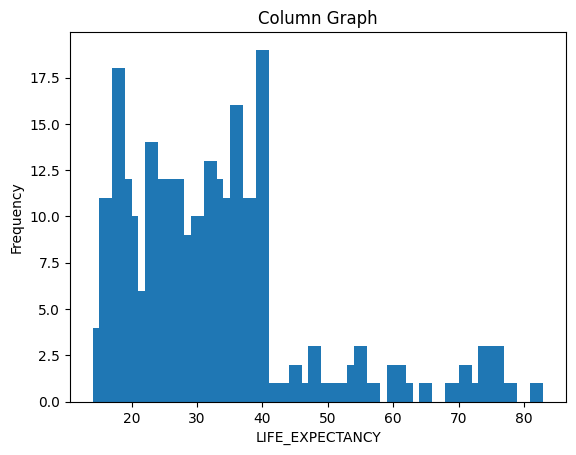

{15: 4, 16: 11, 17: 11, 18: 18, 19: 12, 20: 10, 21: 5, 22: 6, 23: 14, 24: 12, 25: 7, 26: 12, 27: 12, 28: 4, 29: 9, 30: 10, 31: 10, 32: 13, 33: 12, 34: 11, 35: 8, 36: 16, 37: 3, 38: 11, 39: 10, 40: 19, 42: 1, 43: 1, 44: 1, 45: 2, 46: 1, 48: 3, 49: 1, 50: 1, 52: 1, 53: 1, 54: 2, 55: 3, 57: 1, 60: 2, 61: 2, 62: 1, 65: 1, 69: 1, 71: 2, 73: 1, 74: 3, 75: 1, 76: 3, 77: 1, 78: 1, 82: 1}


In [ ]:
#For continuous data
if len(y_train.unique()) > 2:
  value_counts = y_train.value_counts().to_dict()

  labels = list(value_counts.keys())
  data = list(value_counts.values())

  fig, ax = plt.subplots()
  ax.bar(labels, data, width=2)

  ax.set_title('Column Graph')
  ax.set_xlabel(Wanted_Prediction_Column)
  ax.set_ylabel('Frequency')

  plt.show()

  sorted_dict = dict(sorted(value_counts.items()))
  print(sorted_dict)

#For discrete data
else:
  value_counts = y_train.value_counts().to_dict()

  labels = list(value_counts.keys())
  data = list(value_counts.values())

  fig, ax = plt.subplots()
  ax.bar(labels, data, width=0.5)

  ax.set_title('Column Graph')
  ax.set_xlabel(Wanted_Prediction_Column)
  ax.set_ylabel('Frequency')

  plt.xticks(sorted(labels))
  plt.show()

  sorted_dict = dict(sorted(value_counts.items()))
  print(sorted_dict)

# Testing data graph

Answer provided by AI prediction

In [ ]:
if selection == '2':
  dfeval[Wanted_Prediction_Column] = Guess_list
  value_counts = dfeval[Wanted_Prediction_Column].value_counts().to_dict()

  labels = list(value_counts.keys())
  data = list(value_counts.values())

  fig, ax = plt.subplots()
  ax.bar(labels, data, width=0.5)

  ax.set_title('Column Graph')
  ax.set_xlabel(Wanted_Prediction_Column)
  ax.set_ylabel('Frequency')


  plt.xticks(sorted(labels))

  plt.show()

  sorted_dict = dict(sorted(value_counts.items()))
  print(sorted_dict)

# User input graph

Display of the predictions that the AI predicted when viewing user input

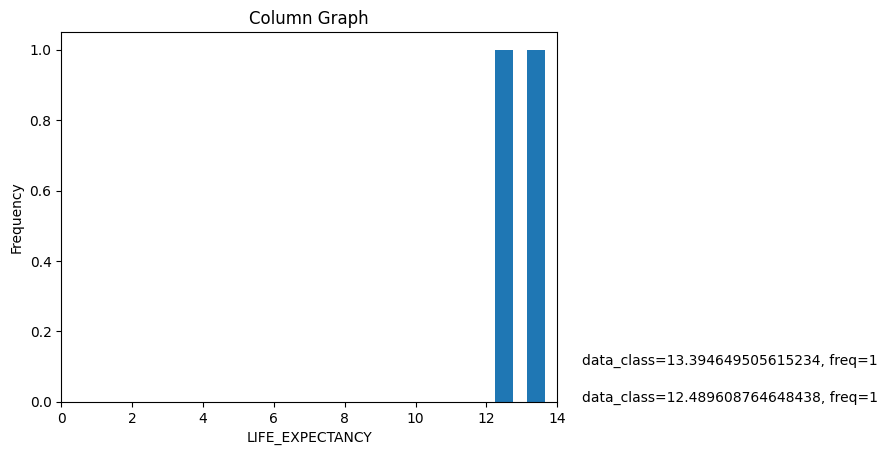

{12.489608764648438: 1, 13.394649505615234: 1}


In [ ]:
#For continuous data
if len(y_train.unique()) > 2:
  user_data[Wanted_Prediction_Column] = predictions

  value_counts = user_data[Wanted_Prediction_Column].value_counts().to_dict()

  labels = list(value_counts.keys())
  data = list(value_counts.values())

  fig, ax = plt.subplots()
  ax.bar(labels, data, width=0.5)

  ax.set_title('Column Graph')
  ax.set_xlabel(Wanted_Prediction_Column)
  ax.set_ylabel('Frequency')

  highest_value = int(max(labels))

  tick_l = []
  for i in range(highest_value+2):
    if i % 2 == 0:
      tick_l.append(i)

  plt.xticks(tick_l)


  #Legend
  sorted_dict = dict(sorted(value_counts.items()))
  sorted_labels = list(sorted_dict.keys())
  sorted_data = list(sorted_dict.values())

  legend_labels = [f'data_class={val}, freq={freq}' for val, freq in zip(sorted_labels, sorted_data)]
  for i, label in enumerate(legend_labels):
      plt.text(1.05, i*0.1, label, transform=plt.gca().transAxes)

  plt.show()

  print(sorted_dict)

#For discrete data
else:
  user_data[Wanted_Prediction_Column] = predictions

  value_counts = user_data[Wanted_Prediction_Column].value_counts().to_dict()

  labels = list(value_counts.keys())
  data = list(value_counts.values())

  fig, ax = plt.subplots()
  ax.bar(labels, data, width=0.5)

  ax.set_title('Column Graph')
  ax.set_xlabel(Wanted_Prediction_Column)
  ax.set_ylabel('Frequency')

  plt.xticks(sorted(labels))

  #Legend
  sorted_dict = dict(sorted(value_counts.items()))
  sorted_labels = list(sorted_dict.keys())
  sorted_data = list(sorted_dict.values())

  legend_labels = [f'data_class={val}, freq={freq}' for val, freq in zip(sorted_labels, sorted_data)]
  for i, label in enumerate(legend_labels):
      plt.text(1.05, i*0.1, label, transform=plt.gca().transAxes)

  plt.show()

  print(sorted_dict)

# **Statistics**

In [ ]:
y_train.describe()

count    309.000000
mean      32.022654
std       13.675606
min       15.000000
25%       23.000000
50%       30.000000
75%       38.000000
max       82.000000
Name: LIFE_EXPECTANCY, dtype: float64

In [ ]:
print(f"Range: {y_train.describe()[7]-y_train.describe()[3]}")
print(f"IQR: {y_train.describe()[6]-y_train.describe()[4]}")

Range: 67.0
IQR: 15.0
